### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


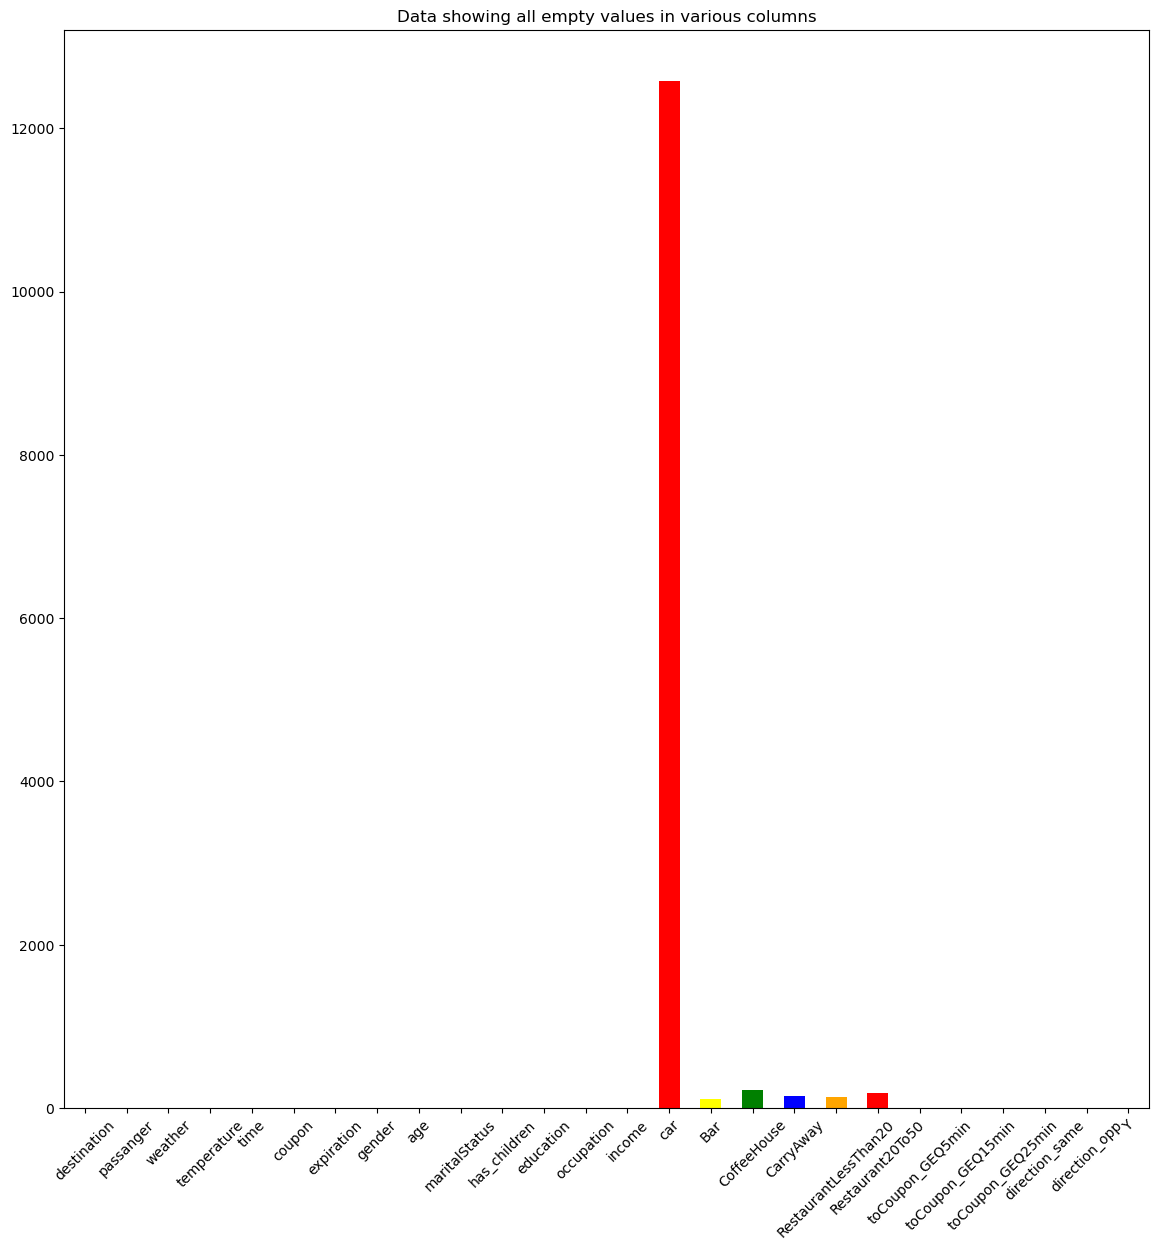

In [9]:
print(data.isnull().sum())
data_colors = ['yellow', 'green', 'blue', 'orange', 'red']
plt1 = data.isnull().sum().plot(kind='bar', figsize=(14, 14), color=data_colors, title="Data showing all empty values in various columns")
plt.xticks(rotation=45)
plt.savefig('./images/before_dropping_car_col.png')

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# drop car column as that has the most data
data.drop(columns=["car"], inplace=True)

In [13]:
# drop duplicates
data=data.drop_duplicates()

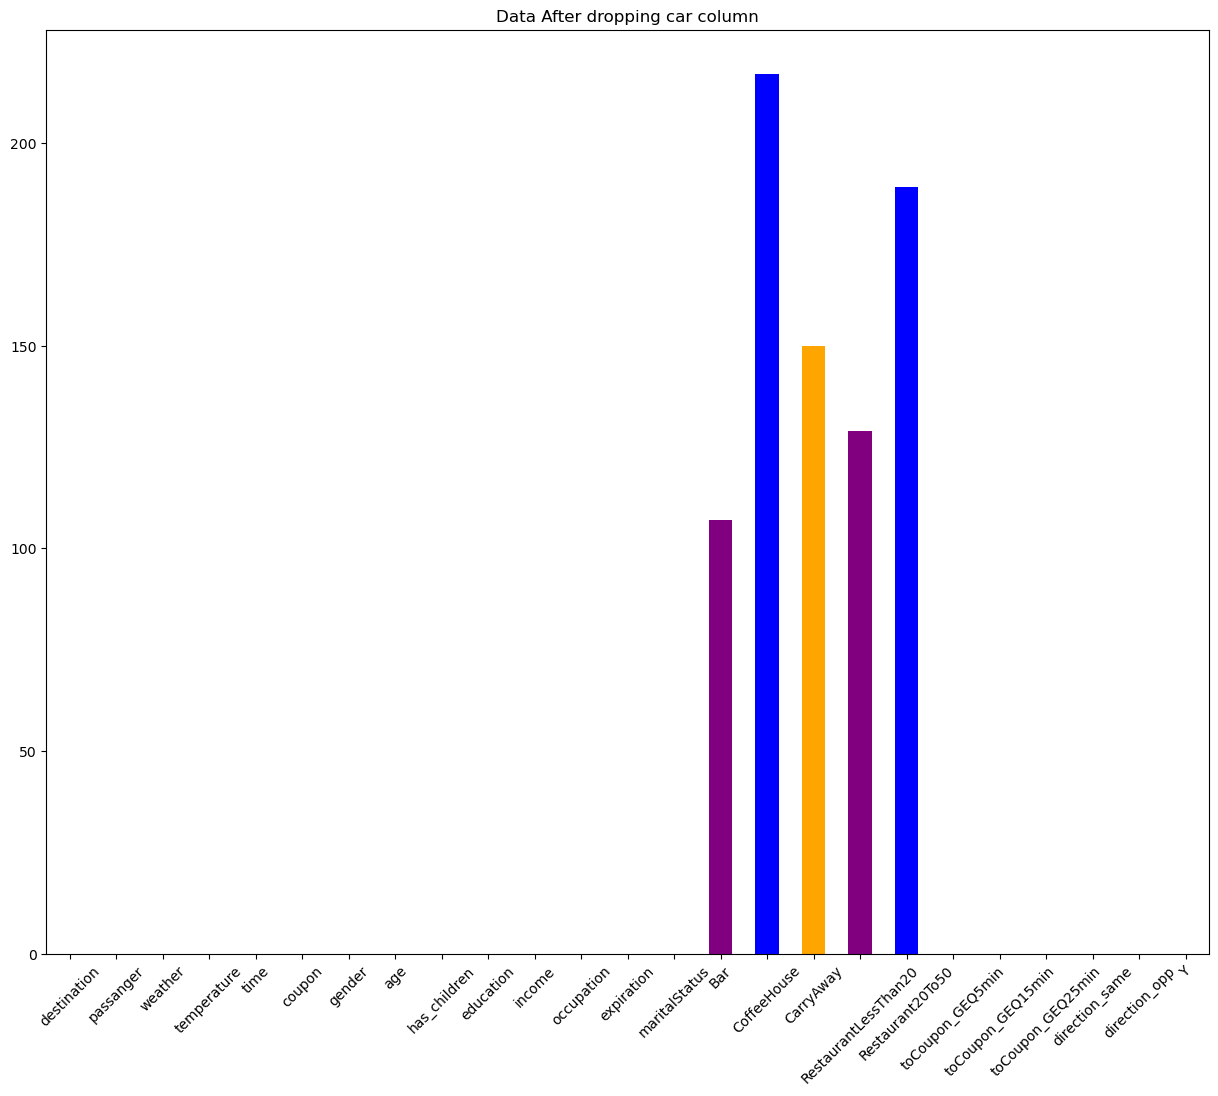

         Bar CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50
1524   never         1~3       1~3                less1            less1
10747  less1         gt8       4~8                  4~8              4~8
10617  less1       less1       4~8                  gt8              gt8
1251   less1         4~8       4~8                  1~3            never
8302     1~3         1~3       1~3                  4~8              4~8
4628     4~8         4~8       4~8                  1~3            never
12658  less1       never       4~8                  gt8            less1
6760   less1       less1       gt8                  4~8              1~3
9298   never       less1       1~3                  4~8              4~8
1040   never       never       1~3                  gt8            never
4878   never       never     never                less1              NaN
8339   less1         4~8       gt8                  1~3            less1
35     never       less1       4~8                 

In [15]:
cols_to_plot = ['destination','passanger','weather','temperature','time','coupon','gender','age'
                ,'has_children','education','income','occupation','expiration','maritalStatus', 
                'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 
                'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min','direction_same','direction_opp', 'Y']
plt2 = data[cols_to_plot].isnull().sum().plot(kind='bar', figsize=(15, 12), color=['blue', 'orange', 'purple'], title="Data After dropping car column")
plt.xticks(rotation=45)
plt.savefig('./images/after_dropping_car_col.png')
plt.show()

print(data[ ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'] ].sample(20))

4. What proportion of the total observations chose to accept the coupon?



56.75654242664552


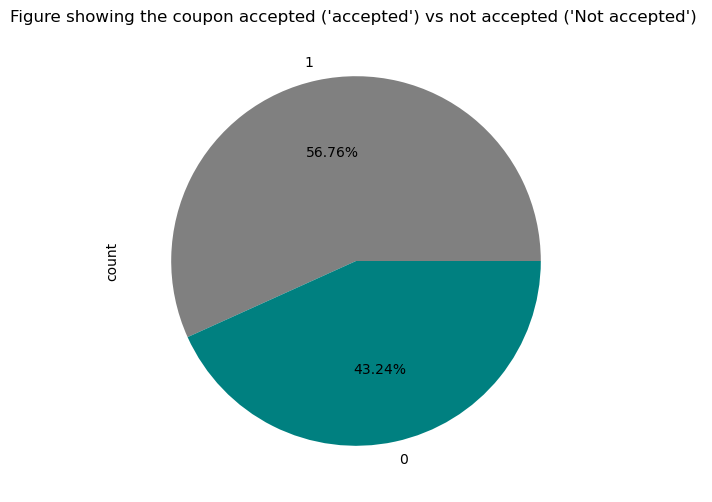

Percentage Accepted:  56.76 %
Percentage Rejected: 43.24 %


In [17]:
total_accepted = data['Y'].mean() * 100

print(total_accepted)
total = data['Y'].value_counts()

total.plot(kind='pie', figsize=(6, 6), colors=['grey', 'teal'], 
           autopct='%1.2f%%', 
           title="Figure showing the coupon accepted ('accepted') vs not accepted ('Not accepted') " ) 
plt.savefig('./images/total_observations.png')
plt.show()

print('Percentage Accepted: ', round(total_accepted, 2), '%')

print('Percentage Rejected:', 100 - round(total_accepted, 2), '%')

5. Use a bar plot to visualize the `coupon` column.

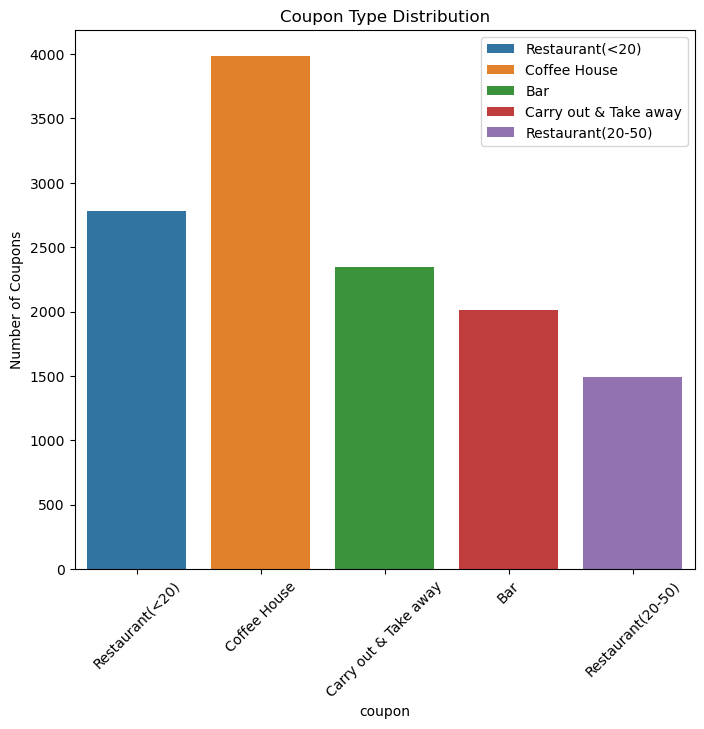

In [19]:
plt.figure(figsize=(8,7))
sns.countplot(data=data ,x='coupon',hue='coupon')
plt.legend(labels = ['Restaurant(<20)', 'Coffee House', 'Bar' ,'Carry out & Take away',
       'Restaurant(20-50)'])
plt.xticks(rotation=45)
plt.title('Coupon Type Distribution')
plt.ylabel("Number of Coupons") ;
plt.savefig('./images/coupon_visualize_bar.png')
plt.show()

6. Use a histogram to visualize the temperature column.

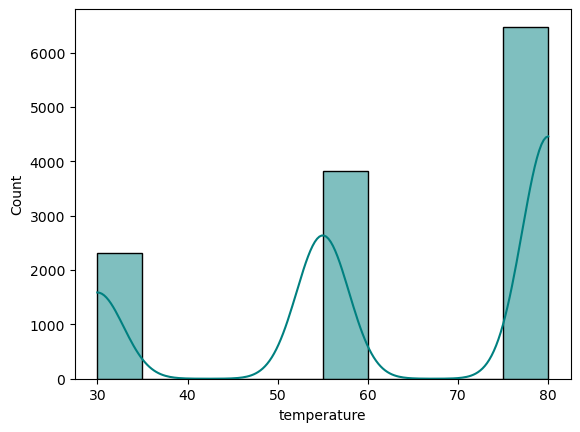

In [21]:
sns.histplot(data['temperature'], bins=10, kde=True, color="teal")
plt.savefig('./images/temperature_histogram.png')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [101]:
df_with_bar_coupons = data[ data['coupon'] == 'Bar' ]
print(df_with_bar_coupons)

           destination  passanger weather  temperature  time coupon  \
9      No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
13                Home      Alone   Sunny           55   6PM    Bar   
17                Work      Alone   Sunny           55   7AM    Bar   
24     No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
35                Home      Alone   Sunny           55   6PM    Bar   
...                ...        ...     ...          ...   ...    ...   
12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
12682             Work      Alone   Snowy           30   7AM    Bar   

      expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
9             1d  Female  21  Unmarried partner  ...        never   

2. What proportion of bar coupons were accepted?


In [109]:
accepted = df_with_bar_coupons['Y'].mean() * 100
print(round(accepted, 2))

41.0


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


['never' 'less1' '1~3' 'gt8' nan '4~8']
bar_visit_category
gt3    62.857143
lt3    40.206186
Name: Y, dtype: float64


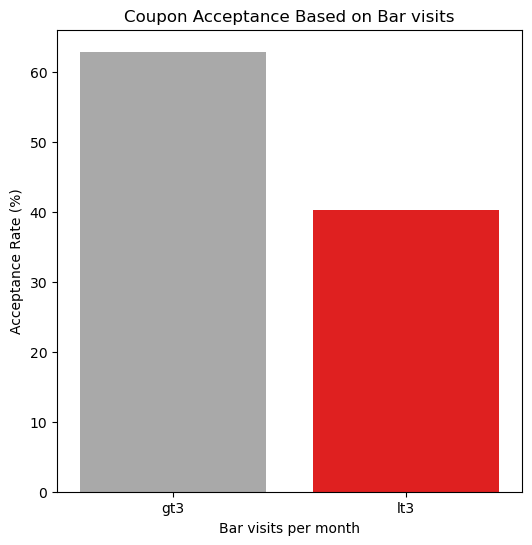

Answer: Yes there is a higher acceptance Rate in peole who visits more than 3 times


In [131]:
print(df_with_bar_coupons['Bar'].unique())
df_with_bar_coupons = df_with_bar_coupons.assign( bar_visit_category = lambda df: df['Bar']
                                                 .apply( lambda val:'lt3' 
                                                        if ((isinstance(val,int) and val <= 3) or (isinstance(val,str) and val != 'gt8'))
                                                        else 'gt3'))

acceptanceRates = df_with_bar_coupons.groupby('bar_visit_category')['Y'].mean() * 100

print(acceptanceRates)

plt.figure(figsize=(6,6))
sns.barplot(x=acceptanceRates.index,
            y=acceptanceRates.values,
            palette=["darkgrey", "red"],
            hue=acceptanceRates.index
           )
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Bar visits per month")
plt.title("Coupon Acceptance Based on Bar visits")
plt.savefig('./images/coupon_acceptance_based_on_visit_freq.png')
plt.show()

print('Answer: Yes there is a higher acceptance Rate in peole who visits more than 3 times')

 4c. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?
c

In [269]:
print(df_with_bar_coupons.head())

        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...  toCoupon_GEQ5min toCoupon_GEQ15min  \
9   Female  21  Unmarried partner  ...                 1                 1   
13  Female  21  Unmarried partner  ...                 1                 0   
17  Female  21  Unmarried partner  ...                 1                 1   
24    Male  21             Single  ...                 1                 0   
35    Male  21             Single  ...                 1                 0   

   toCoupon_GEQ25min direction_same direction_opp  Y bar

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['never' 'less1' '1~3' 'gt8' nan '4~8']
[False  True]
freq_and_age_over_25
False    48.664122
True     38.290713
Name: Y, dtype: float64


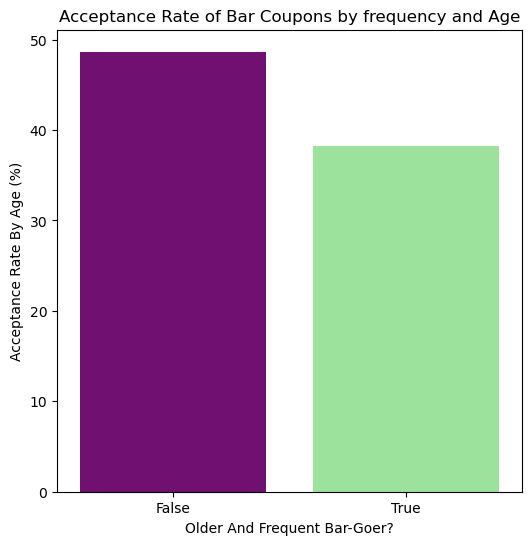

In [271]:
print(df_with_bar_coupons['age'].unique())
above_25 = ['46','26','31','41','50plus','36']

print(df_with_bar_coupons['Bar'].unique())

df_with_bar_coupons = df_with_bar_coupons.assign( freq_and_age_over_25 = lambda df: df['age'].isin(above_25) & df['Bar'] >= 1)


print(df_with_bar_coupons['freq_and_age_over_25'].unique())


acceptance_by_age = df_with_bar_coupons.groupby('freq_and_age_over_25')['Y'].mean() * 100

print(acceptance_by_age)

plt.figure(figsize=(6, 6))
sns.barplot(
    x=acceptance_by_age.index.astype(str),
    y=acceptance_by_age.values,
    palette=['purple', 'lightgreen'],
    hue=acceptance_by_age.index.astype(str)
)

plt.ylabel("Acceptance Rate By Age (%)")
plt.xlabel("Older And Frequent Bar-Goer?")
plt.title("Acceptance Rate of Bar Coupons by frequency and Age")
plt.savefig('./images/freq_and_age.png')
plt.show()

5c. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were noct a kid and had occupations other than farming, fishing, or forestry.
c

In [156]:
df_with_bar_coupons['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [158]:
print(df_with_bar_coupons['age'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [160]:
print(df_with_bar_coupons['Bar'].unique())

['never' 'less1' '1~3' 'gt8' nan '4~8']


In [291]:
bar_visit_values1=['1~3','4~8','gt8']
occ_values1=['farming','fishing','forestry']
pass_values1=['Kid(s)']
pass_values2=['Alone','Friend(s)','Partner']

occ_temp_data = df_with_bar_coupons.query("occupation not in @occ_values1 ")
no_of_drivers = len(occ_temp_data.loc[(occ_temp_data['Bar'].isin(bar_visit_values1)) 
                                                    & (occ_temp_data['passanger'].isin(pass_values2))])

print("Acceptance rate for Drivers who went to the Bar > Once a month with non Kids passengers and occupations", no_of_drivers )



Acceptance rate for Drivers who went to the Bar > Once a month with non Kids passengers and occupations 551


 c6v. Compare the acceptance rates between those drivers who:

 v- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- vgo to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [305]:
# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
bar_visit_values1=['1~3','4~8','gt8']
pass_values1=['Friend(s)','Partner']

ndr_mt1m_pass_fandp = len(df_with_bar_coupons.loc[(df_with_bar_coupons['Bar'].isin(bar_visit_values1)) 
                                                    & (df_with_bar_coupons['passanger'].isin(pass_values1))])

print("Acceptance rate for drivers who went to the Bar more than once a month with no Kids and Not Widowed - ", 
      ndr_mt1m_pass_fandp)
# go to bars more than once a month and are under the age of 30 OR

bar_visit_values1=['1~3','4~8','gt8']
age_values1=['below21','21','26']

ndr_mt1m_under30 = len(df_with_bar_coupons.loc[(df_with_bar_coupons['Bar'].isin(bar_visit_values1)) 
                                                    & (df_with_bar_coupons['age'].isin(age_values1))])

print("Acceptance rate for drivers who went to the Bar more than once a month and under age 30 - ", 
      ndr_mt1m_under30)
df_with_bar_coupons['RestaurantLessThan20'].value_counts()
df_with_bar_coupons['income'].value_counts()
# go to cheap restaurants more than 4 times a month and income is less than 50K.

cheap_rest_visit_values1=['4~8','gt8']
income_values1=['$12500 - $24999','$25000 - $37499','$37500 - $49999']

ndr_mtm4times_inclt_50k = len(df_with_bar_coupons.loc[(df_with_bar_coupons['RestaurantLessThan20'].isin(cheap_rest_visit_values1)) 
                                                    & (df_with_bar_coupons['income'].isin(income_values1))])

print("Acceptance rate for drivers who went to Cheap Restaurant more than 4 times and income less than 50k - ", 
      ndr_mtm4times_inclt_50k)

Acceptance rate for drivers who went to the Bar more than once a month with no Kids and Not Widowed -  195
Acceptance rate for drivers who went to the Bar more than once a month and under age 30 -  345
Acceptance rate for drivers who went to Cheap Restaurant more than 4 times and income less than 50k -  271


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [307]:
print('=' * 80)
print('People who often goes to the bar and not have a kid has a higher chance of accepting the bar coupon than any other categories')
print('=' * 80)

People who often goes to the bar and not have a kid has a higher chance of accepting the bar coupon than any other categories


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [309]:
# checking for another coupon dataset 

# CREATE A DATAFRAME WITH JUST COFFEE COUPONS

df_with_coffe_coupons = data[ data['coupon'] == 'Coffee House' ]
df_with_coffe_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [311]:
#Analyse weather values in the dataset
df_with_coffe_coupons['weather'].value_counts()

weather
Sunny    3461
Snowy     302
Rainy     226
Name: count, dtype: int64

In [313]:
df_with_coffe_coupons['CoffeeHouse'].value_counts()

CoffeeHouse
less1    1072
1~3      1038
never     927
4~8       538
gt8       342
Name: count, dtype: int64

In [317]:
## Explore drivers who accept token to coffe house when weather is not sunny
weather_values1=['Snowy','Rainy']

#create a temp data sets excluding Drivers that don't go to Coffee House
coffee_temp_data = df_with_coffe_coupons.query("CoffeeHouse != 'never'")
no_of_drivers_coffee_house = len(coffee_temp_data.loc[(coffee_temp_data['weather'].isin(weather_values1))])

print("Acceptance rate for drivers who goto the Coffee House when it's not Sunny - ",no_of_drivers_coffee_house)

Acceptance rate for drivers who goto the Coffee House when it's not Sunny -  408


In [321]:
df_with_coffe_coupons['passanger'].value_counts()

passanger
Alone        2253
Friend(s)    1226
Partner       304
Kid(s)        206
Name: count, dtype: int64

In [323]:
# Explore CoffeeHouse with Female Gender with Kids and Partner
pass_values1=['Kid(s)','Partner']

#create a temp data sets excluding Drivers that don't go to Coffee House
coffee_temp_data1 = df_with_coffe_coupons.query("gender == 'Female'")
no_of_female_kids_partner = len(coffee_temp_data1.loc[(coffee_temp_data1['passanger'].isin(pass_values1))])

print("Acceptance rate for female drivers with kids and Partners going to the Coffee House - ",no_of_female_kids_partner)

Acceptance rate for female drivers with kids and Partners going to the Coffee House -  275


In [327]:
# Explore CoffeeHouse with Male Gender with Kids and Partner
pass_values1=['Kid(s)','Partner']

#create a temp data sets excluding Drivers that don't go to Coffee House
coffee_temp_data2 = df_with_coffe_coupons.query("gender == 'Male'")
no_of_male_kids_partner = len(coffee_temp_data2.loc[(coffee_temp_data2['passanger'].isin(pass_values1))])

print("Acceptance rate for male drivers with kids and Partners going to the Coffee House - ",no_of_male_kids_partner)


Acceptance rate for male drivers with kids and Partners going to the Coffee House -  235


In [329]:
# Explore CoffeeHouse with Male Gender and Alone and Partner
pass_values1=['Alone','Partner']

#create a temp data sets excluding Drivers that don't go to Coffee House
coffee_temp_data3 = df_with_coffe_coupons.query("gender == 'Male'")
no_of_male_alone_partner = len(coffee_temp_data3.loc[(coffee_temp_data3['passanger'].isin(pass_values1))])

print("Acceptance rate for Male drivers with kids and alone going to the Coffee House - ",no_of_male_alone_partner)

Acceptance rate for Male drivers with kids and alone going to the Coffee House -  1254


In [333]:
# List of values for Education
df_with_coffe_coupons['education'].value_counts()

education
Bachelors degree                          1370
Some college - no degree                  1368
Graduate degree (Masters or Doctorate)     594
Associates degree                          350
High School Graduate                       279
Some High School                            28
Name: count, dtype: int64

In [337]:
#list of Gender values
df_with_coffe_coupons['gender'].value_counts()

gender
Female    2048
Male      1941
Name: count, dtype: int64

In [343]:
# Explore CoffeeHouse with Male or Female and College Education & Degree
college_values1=['Bachelors degree','Graduate degree (Masters or Doctorate)','Associates degree']
no_of_drivers_college_degree = len(df_with_coffe_coupons.loc[(df_with_coffe_coupons['education'].isin(college_values1))])

print("Acceptance rate for Drivers with College Degree going to the Coffee House - ",no_of_drivers_college_degree)

Acceptance rate for Drivers with College Degree going to the Coffee House -  2314


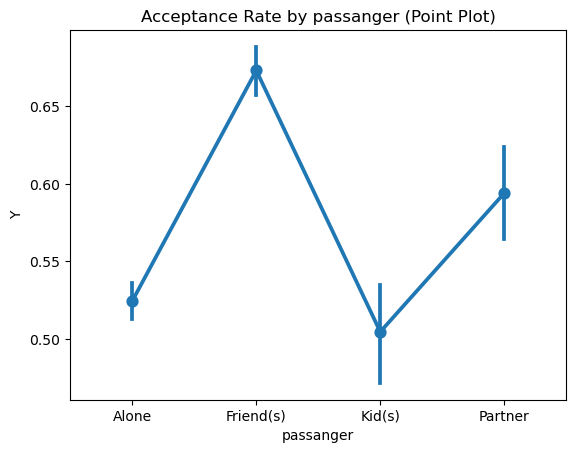

Result: This chart shows that travelling with Friends had a higher influence on accepting coupons. We can check further which type of coupon they accepted


In [345]:
# Using pointplot to represent the same
sns.pointplot(
    data=data,
    x='passanger',
    y='Y',
    estimator='mean'
)
plt.title("Acceptance Rate by passanger (Point Plot)")
plt.savefig('./images/passanger-impact_point-plot.png')
plt.show()


print('=' * 80)
print('Result: This chart shows that travelling with Friends had a higher influence on accepting coupons. We can check further which type of coupon they accepted')
print('=' * 80)

['Sunny' 'Rainy' 'Snowy']
[80 55 30]
temperature  weather
30           Snowy      43.377483
             Sunny      66.666667
55           Rainy      52.212389
             Sunny      44.041945
80           Sunny      52.899458
Name: Y, dtype: float64


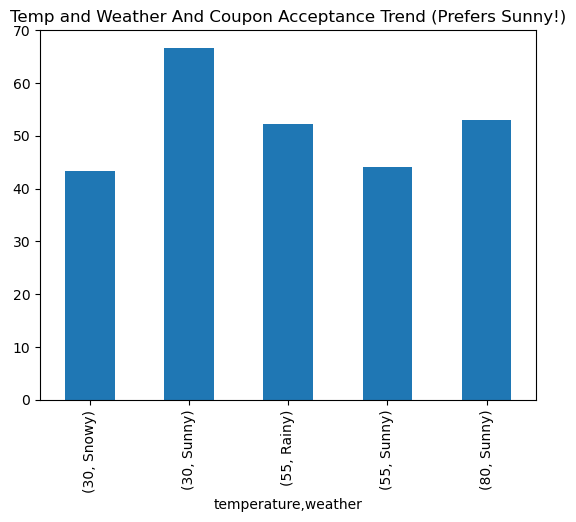

Result: This chart shows that Sunny weather even in snowy temperature has more positive impact


In [349]:
print(df_with_coffe_coupons['weather'].unique())
print(df_with_coffe_coupons['temperature'].unique())

# Analyse how weather and temperature play together
acceptance_by_weather = df_with_coffe_coupons.groupby(['temperature', 'weather'])['Y'].mean() * 100
print(acceptance_by_weather)
acceptance_by_weather.plot(kind='bar', title='Temp and Weather And Coupon Acceptance Trend (Prefers Sunny!)')
plt.savefig('./images/weather-and-temp-impact.png')
plt.show()

# As Sunny weather has a positive influence overall, this alone can be considered as one of the key factors and temperature can be avoided


print('=' * 80)
print('Result: This chart shows that Sunny weather even in snowy temperature has more positive impact')
print('=' * 80)

In [353]:
print('*' * 80)
print('After analysis this is what we determined -> peopled preferred coffee coupons :')
print('\t 1. on A Sunny Weather even in snowy temperature')
print('\t 2. Travelling with Friends')
print('\t 3. Drivers with College Degree')
print('\t 4. Male drivers travelling alone)')
print('*' * 80)

********************************************************************************
After analysis this is what we determined -> peopled preferred coffee coupons :
	 1. on A Sunny Weather even in snowy temperature
	 2. Travelling with Friends
	 3. Drivers with College Degree
	 4. Male drivers travelling alone)
********************************************************************************
